# El Juego de la Vida de Conway

**Autor**: Jesús Araujo  
**Fecha**: [10/31/2024]

## Introducción

El Juego de la Vida es un autómata celular diseñado por el matemático británico **John Horton Conway** en 1970. Este autómata se ejecuta en una cuadrícula bidimensional en la que cada celda tiene dos estados posibles: viva o muerta. A través de un conjunto de reglas simples, el sistema evoluciona generando patrones complejos que simulan la vida y la muerte de las células en función de su entorno.

## Reglas del Juego

El estado de cada celda en la siguiente generación depende del número de celdas vecinas vivas en la generación actual. Las reglas son las siguientes:

1. **Supervivencia**: Una célula viva con 2 o 3 vecinas vivas permanece viva en la siguiente generación.
2. **Muerte**: Una célula viva con menos de 2 vecinas vivas muere por soledad. Si tiene más de 3 vecinas vivas, muere por superpoblación.
3. **Nacimiento**: Una célula muerta con exactamente 3 vecinas vivas se convierte en una célula viva.

## Implementación

La implementación de este juego se puede realizar fácilmente en Python usando `numpy` para crear y manipular la cuadrícula y `matplotlib` para visualizar la evolución del tablero. Se comienza con una cuadrícula inicial generada aleatoriamente o configurada con un patrón específico.


# Importar las bibliotecas necesarias

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Definición del tablero inicial y las reglas de actualización 

In [15]:
# Configuración inicial
grid_size = 50   # Tamaño del tablero (50x50 celdas)
probability_alive = 0.2  # Probabilidad de que una celda inicie viva

# Generar tablero inicial aleatoriamente
grid = np.random.choice([0, 1], size=(grid_size, grid_size), p=[1 - probability_alive, probability_alive])

# Función para calcular el estado siguiente del tablero
def update_grid(grid):
    new_grid = grid.copy()  # Hacer una copia del tablero
    for row in range(grid.shape[0]):
        for col in range(grid.shape[1]):
            # Sumar las celdas vecinas
            total = (grid[row, (col-1)%grid_size] + grid[row, (col+1)%grid_size] +
                     grid[(row-1)%grid_size, col] + grid[(row+1)%grid_size, col] +
                     grid[(row-1)%grid_size, (col-1)%grid_size] + grid[(row-1)%grid_size, (col+1)%grid_size] +
                     grid[(row+1)%grid_size, (col-1)%grid_size] + grid[(row+1)%grid_size, (col+1)%grid_size])
            
            # Aplicar las reglas del juego
            if grid[row, col] == 1:  # Celda viva
                if total < 2 or total > 3:
                    new_grid[row, col] = 0  # Muere
            else:  # Celda muerta
                if total == 3:
                    new_grid[row, col] = 1  # Nace
    return new_grid


# Visualización y animación del juego

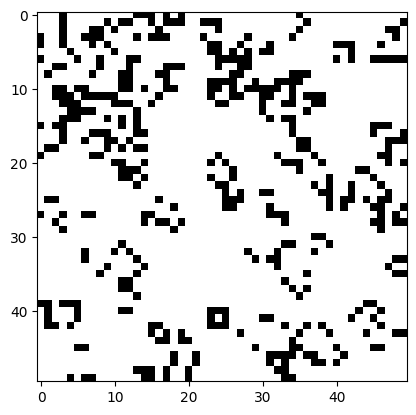

In [16]:
# Configurar la visualización
fig, ax = plt.subplots()
img = ax.imshow(grid, cmap='binary')  # Representación en blanco y negro

# Función de actualización para cada frame de la animación
def animate(frame):
    global grid
    grid = update_grid(grid)
    img.set_data(grid)
    return [img]

# Crear la animación
ani = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
plt.show()


# Triángulo de Sierpinski

**Autor**: Jesús Araujo  
**Fecha**: [31/10/2024]

## Introducción

El **Triángulo de Sierpinski** es un fractal y un ejemplo clásico de autosemejanza. Fue descrito por el matemático polaco **Wacław Sierpiński** en 1915 y es conocido por su estructura única, en la que se repite el mismo patrón triangular en diferentes escalas. Este fractal se construye al dividir un triángulo en cuatro sub-triángulos, eliminando el triángulo central, y repitiendo este proceso en los triángulos restantes de manera infinita o hasta alcanzar el nivel deseado de detalle.

## Propiedades

1. **Autosimilitud**: El Triángulo de Sierpinski está compuesto de múltiples copias más pequeñas de sí mismo, en diferentes escalas.
2. **Dimensión Fractal**: La dimensión fractal del Triángulo de Sierpinski es aproximadamente 1.585, lo que significa que está entre una línea (dimensión 1) y una superficie (dimensión 2).

## Construcción Recursiva

La construcción del Triángulo de Sierpinski se basa en un proceso iterativo o recursivo. A continuación, se detalla el proceso para construirlo:

1. Comienza con un triángulo equilátero.
2. Divide este triángulo en cuatro sub-triángulos de igual tamaño.
3. Elimina el triángulo central.
4. Repite este proceso en cada uno de los tres triángulos restantes hasta alcanzar el nivel de profundidad deseado.

## Implementación en Python

La siguiente implementación utiliza `matplotlib` en Python para dibujar el Triángulo de Sierpinski. Se puede configurar la profundidad de recursión para controlar el nivel de detalle del fractal.

## Crear la función para el Triángulo de Sierpinski

In [17]:
# Función para dibujar un triángulo equilátero dado por sus tres vértices
def draw_triangle(ax, vertices, color="black"):
    triangle = plt.Polygon(vertices, edgecolor=color, fill=True)
    ax.add_patch(triangle)

# Función recursiva para construir el Triángulo de Sierpinski
def sierpinski(ax, vertices, depth):
    if depth == 0:
        draw_triangle(ax, vertices)
    else:
        # Calcular los puntos medios de cada lado del triángulo
        midpoints = [
            (vertices[0] + vertices[1]) / 2,
            (vertices[1] + vertices[2]) / 2,
            (vertices[2] + vertices[0]) / 2
        ]
        
        # Llamada recursiva en cada triángulo de las esquinas
        sierpinski(ax, [vertices[0], midpoints[0], midpoints[2]], depth - 1)
        sierpinski(ax, [vertices[1], midpoints[0], midpoints[1]], depth - 1)
        sierpinski(ax, [vertices[2], midpoints[1], midpoints[2]], depth - 1)


## Visualizar el Triángulo de Sierpinski

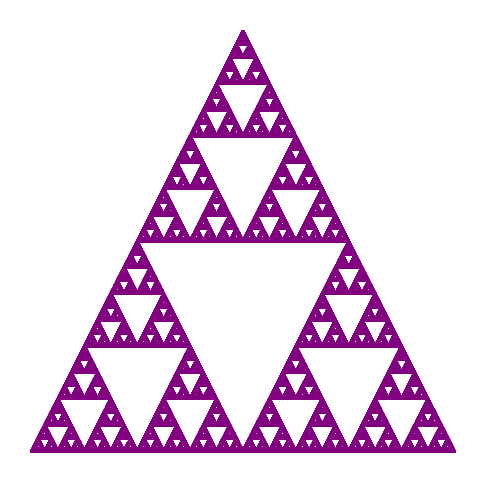

In [18]:
# Configuración inicial
num_points = 1000000  # Número de puntos a generar
depth = 5           # Profundidad de fractal

# Vértices del triángulo equilátero inicial
initial_vertices = np.array([[0, 0], [1, np.sqrt(3)], [2, 0]])

# Elegir un punto inicial (generalmente el centroide del triángulo)
point = np.array([1, np.sqrt(3)/2])

# Lista para almacenar los puntos generados
points = [point]

# Generar puntos usando el "juego del caos"
for _ in range(num_points):
    # Elegir aleatoriamente uno de los vértices
    random_vertex = initial_vertices[np.random.choice([0, 1, 2])]
    # Calcular el punto medio entre el punto actual y el vértice seleccionado
    point = (point + random_vertex) / 2
    points.append(point)

# Convertir la lista de puntos a un arreglo para graficarlo
points = np.array(points)

# Configuración de la figura y el gráfico
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.scatter(points[:, 0], points[:, 1], color="purple", s=0.5)  # Ajusta el color y tamaño de los puntos aquí

# Mostrar el triángulo de Sierpinski
plt.show()

